# Simple RNN(Many-to-one 문제)
- 시인파형 시계열을 입력으로 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만든다

- 데이터 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = np.sin(np.arange(21) * np.pi/4.)      # pi / 4는 45도
s

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        6.12323400e-16])

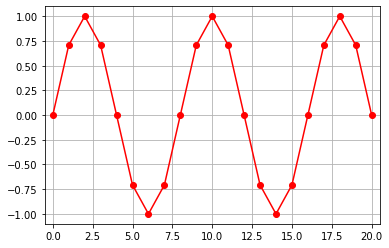

In [3]:
plt.plot(s, 'ro-')
plt.xlim(-0.5,20.5), plt.ylim(-1.1,1.1), plt.grid()
plt.show()

- X_train, y_train 데이터 만들기

In [4]:
X_train = []
y_train = np.empty(len(s) - 3)
for i in range(len(s)-3):
    X_train.append(s[i:i+3])
    y_train[i] = s[i+3]
y_train

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  3.67394040e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  6.12323400e-16])

In [6]:
X_train = np.array(X_train).reshape(-1,3,1)
X_train.shape

(18, 3, 1)

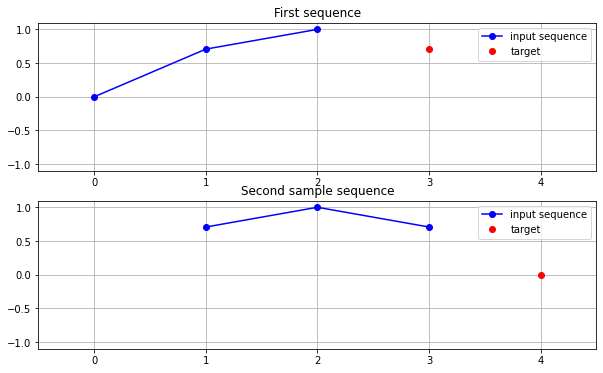

In [9]:
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot([0,1,2], X_train[0].flatten(), 'bo-', label='input sequence')
plt.plot([3], y_train[0], 'ro', label='target')
plt.xlim(-0.5, 4.5), plt.ylim(-1.1, 1.1), plt.grid()
plt.legend(), plt.title('First sequence')

plt.subplot(212)
plt.plot([1,2,3], X_train[1].flatten(), 'bo-', label='input sequence')
plt.plot([4], y_train[1], 'ro', label='target')
plt.xlim(-0.5, 4.5), plt.ylim(-1.1, 1.1), plt.grid()
plt.legend(), plt.title('Second sample sequence')

plt.show()

- 순환 신경망 모델 정의/설정

In [10]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [13]:
np.__version__   # version 1.20.2에서는 아래 모델 정의가 안됨

'1.19.5'

In [15]:
model = Sequential([
    SimpleRNN(10, input_shape=X_train.shape[1:], activation='tanh'),
    Dense(1, activation='linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='mse')

- 모델 학습전

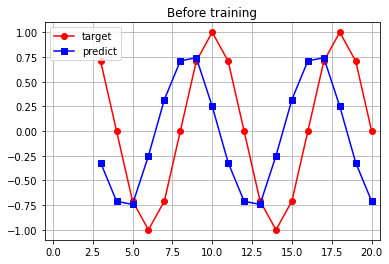

In [17]:
plt.plot(np.arange(3,21), y_train, 'ro-', label='target')
plt.plot(np.arange(3,21), model.predict(X_train), 'bs-', label='predict')
plt.xlim(-0.5,20.5), plt.ylim(-1.1,1.1), plt.grid()
plt.legend(), plt.title('Before training')
plt.show()

- 모델 학습

In [18]:
hist = model.fit(X_train, y_train, epochs=100, verbose=0)

- 학습 결과 확인

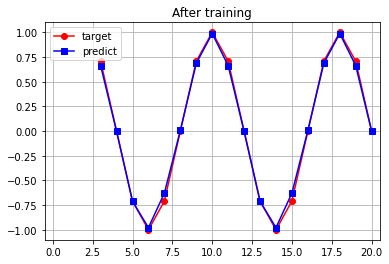

In [19]:
plt.plot(np.arange(3,21), y_train, 'ro-', label='target')
plt.plot(np.arange(3,21), model.predict(X_train), 'bs-', label='predict')
plt.xlim(-0.5,20.5), plt.ylim(-1.1,1.1), plt.grid()
plt.legend(), plt.title('After training')
plt.show()

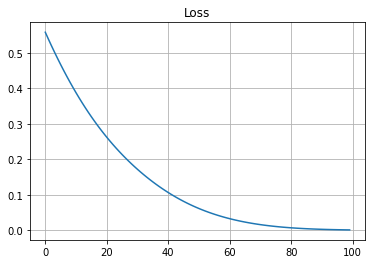

In [20]:
plt.plot(hist.history['loss'])
plt.title('Loss'), plt.grid()
plt.show()